In [1]:
%load_ext autoreload
%autoreload 2

In [4]:
%cd .. 

/Users/xiaoyangsong/Desktop/IOE 691/SGHMC


In [5]:
from src.simulate import *
import seaborn as sns

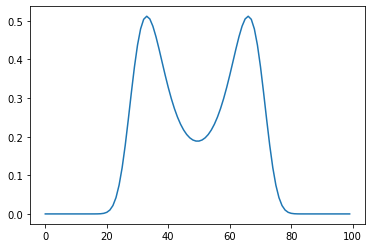

In [129]:
n_steps = 100
lb, ub = -3, 3
x = np.linspace(lb, ub, n_steps)
pgt = gt(x)
plt.plot(pgt / ((ub - lb) / n_steps))

In [130]:
from src.hmc import * 
n_samples = 80000
xt = 0
M = 1
eps=0.1
L=50

samples = {}
# generate samples
# I: Naive HMC without correction
correction=False
naive_hmc_samples = []
for _ in range(n_samples):
    xt = naive_hmc(function, grad, M, eps, L, xt, correction)
    naive_hmc_samples.append(xt)
samples['Standard HMC (no MH)'] = np.array(naive_hmc_samples)

# II: Naive HMC with correction
correction=True
naive_hmcmh_samples = []
for _ in range(n_samples):
    xt = naive_hmc(function, grad, M, eps, L, xt, correction)
    naive_hmcmh_samples.append(xt)
samples['Standard HMC (with MH)'] = np.array(naive_hmcmh_samples)

# III: Naive SGHMC without correction
correction=False
naive_sghmc_samples = []
for _ in range(n_samples):
    xt = naive_hmc(function, grad_hat, M, eps, L, xt, correction)
    naive_sghmc_samples.append(xt)
samples['Naive stochastic gradient HMC (no MH)'] = np.array(naive_sghmc_samples)

# IV: Naive SGHMC with correction
correction=True
naive_sghmcnh_samples = []
for _ in range(n_samples):
    xt = naive_hmc(function, grad_hat, M, eps, L, xt, correction)
    naive_sghmcnh_samples.append(xt)
samples['Naive stochastic gradient HMC (with MH)'] = np.array(naive_sghmcnh_samples)

In [131]:
# V: SGHMC
V = 4
B = 0.5 * V * eps; 
C = 3

sghmc_samples = []
for _ in range(n_samples):
    xt = sghmc(function, grad_hat, M, eps, L, xt, C, B)
    sghmc_samples.append(xt)
samples['SGHMC'] = np.array(sghmc_samples)

In [134]:
colors = ['blue', 'green', 'red', 'gold', 'purple']
colors = dict(zip(samples.keys(), colors))
plt.figure(figsize=(8, 6))
plt.plot(x, pgt / ((ub - lb) / n_steps), label = 'Ground Truth', color='black')
for (key, vals) in samples.items():
    # vals, density = np.histogram(vals, bins=n_steps, range=(lb, ub), density=True)
    # plt.plot(x, vals, label=key)
    sns.kdeplot(data=vals.squeeze(), color=colors[key], label=key)
plt.legend()
plt.ylim(0, 0.7)
plt.xlabel(r'$\theta$')
plt.xticks(list(np.arange(-3, 3.5, 0.5)))
# plt.show()
plt.savefig('figure/fig1.jpg', dpi=200)
plt.close()

In [135]:
plt.figure(figsize=(8, 6))
plt.plot(x, pgt / ((ub - lb) / n_steps), label = 'Ground Truth', color='black')
for (key, vals) in samples.items():
    vals, density = np.histogram(vals, bins=n_steps, range=(lb, ub), density=True)
    plt.plot(x, vals, label=key, color=colors[key])
    # sns.kdeplot(data=vals.squeeze(), color=colors[key], label=key)
plt.legend()
plt.ylim(0, 0.8)
# plt.show()
plt.savefig('figure/fig1-discrete.jpg', dpi=200)
plt.close()